# Determination of ratio D in Variable Density Tesseroid Forward Calculation

## Hypotesis

We are going to start with certain assumptions. We will supose that the density is a linear function that dependends on a certain spherical coordinate. First, we will start with dependence only on height:

$\rho(\Delta h) = a\Delta h + b$

Lets compute the value of the gravity potential generated by a Tesseroid with such density by approximating it with a mesh of Tesseroids with constant densities. Each value will be the one that the density function assumes at the center of this little Tesseroids.

In order to do this we must know beforehand the shape of this mesh. Because the variation is only in the radius axis, the mesh can have no divisions in the lon lat axis, so only the radius axis will be divided.

We can find out the optimal number of divisions in the radius axis ($n_r$) by calculating the potential generated by mesh with different values of $n_r$. For lower values of $n_r$, the potential values corresponding with $n_r$ and $n_r -1$ will be very different. But for higher $n_r$, when the potential of the mesh is closer to the true value.

In order to obtain this "true" value, we will calculate the potential for increasing values of $n_r$ until the difference between the potentials created with $n_r$ and $n_r - 1$ is smaller than $10^{-6}\%$.

Optimal nr:  449


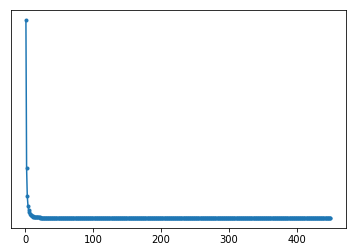

In [4]:
from __future__ import division
import numpy as np
from tesseroid_density import tesseroid
from fatiando.mesher import Tesseroid, TesseroidMesh
from fatiando import gridder
import matplotlib.pyplot as plt


def density_linear(lon, lat, height):
    return height/250. - 50


area = (-30, 30, -30, 30)
shape = (20, 20)
h = 10e3
#lons, lats, heights = gridder.regular(area, shape, z=h)

lons = np.array([0.])
lats = np.array([0.])
heights = np.array([h])

D_high = 8
result = []
nr_values = []
nr = 0
res = 1e42
while True:
    nr += 1
    mesh_shape = (nr, 1, 1)
    w, e, s, n, top, bottom = -10, 10, -10, 10, -3000, -50000
    model_const = TesseroidMesh((w, e, s, n, top, bottom), mesh_shape)
    
    density_list = []
    for tess in model_const:
        lon1, lon2, lat1, lat2, r1, r2 = tess.get_bounds()
        density_list.append(density_linear(0.5*(lon1 + lon2),
                                           0.5*(lat1 + lat2), 0.5*(r1 + r2)))
    model_const.addprop("density", density_list)
    res_old = res
    res = getattr(tesseroid, 'potential')(lons, lats, heights, model_const, ratio=D_high)[0]
    result.append(res)
    nr_values.append(nr)
    diff = 100*abs((res-res_old)/res_old)
    if diff < 1e-8:
        break

result = np.array(result)
print "Optimal nr: ", nr

#%matplotlib gtk
%matplotlib inline
plt.plot(nr_values, np.abs(result), '-', marker='.')
plt.semilogy()
plt.show()

## Calculation of "true" value

Let's calculate the "true" value of the potential for the optimal value of $n_r$ = 449

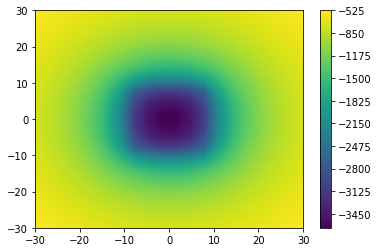

In [5]:
from __future__ import division
import numpy as np
from tesseroid_density import tesseroid
from fatiando.mesher import Tesseroid, TesseroidMesh
from fatiando import gridder
import matplotlib.pyplot as plt


def density_linear(lon, lat, height):
    return height/250. - 50


area = (-30, 30, -30, 30)
shape = (20, 20)
h = 10e3
lons, lats, heights = gridder.regular(area, shape, z=h)

nr = 449
D_high = 8

mesh_shape = (nr, 1, 1)
w, e, s, n, top, bottom = -10, 10, -10, 10, -3000, -50000
model_const = TesseroidMesh((w, e, s, n, top, bottom), mesh_shape)
    
density_list = []
for tess in model_const:
    lon1, lon2, lat1, lat2, r1, r2 = tess.get_bounds()
    density_list.append(density_linear(0.5*(lon1 + lon2),
                                       0.5*(lat1 + lat2),
                                       0.5*(r1 + r2)))
model_const.addprop("density", density_list)
true = getattr(tesseroid, 'potential')(lons, lats, heights, model_const, ratio=D_high)

plt.contourf(lons.reshape(shape), lats.reshape(shape), results.reshape(shape), 150)
plt.colorbar()
plt.show()

Now we use the tesseroid with variable density to calculate the potential using several distance-size ratios and evaluate the maximum difference between them and the "true" potential.

0.5 time:  0.00386023521423 s
1.0 time:  0.0123729705811 s
1.5 time:  0.0352990627289 s
2.0 time:  0.0505828857422 s
2.5 time:  0.0857501029968 s
3.0 time:  0.121682882309 s
3.5 time:  0.184533834457 s
4.0 time:  0.251806974411 s


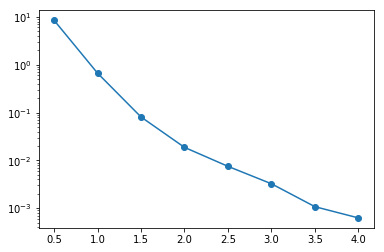

In [11]:
from __future__ import division
import numpy as np
from tesseroid_density import tesseroid
from fatiando.mesher import Tesseroid, TesseroidMesh
from fatiando import gridder
import matplotlib.pyplot as plt
import time

def density_linear(lon, lat, height):
    return height/250. - 50

area = (-30, 30, -30, 30)
shape = (20, 20)
h = 10e3
lons, lats, heights = gridder.regular(area, shape, z=h)
true = results

# Calculate error for each distance-size ratio D
D_values = np.arange(0.5, 4.5, 0.5)
#D_values = [0.5, 1, 1.5] + range(2, 10, 1)
errors = []
for D in D_values:
    w, e, s, n, top, bottom = -10, 10, -10, 10, -3000, -50000
    model = Tesseroid(w, e, s, n, top, bottom, props={"density":density_linear})
    st = time.time()
    result = getattr(tesseroid, 'potential')(lons, lats, heights, [model], ratio=D)
    print D, "time: ", time.time() - st, "s"
    diff = 100*np.max(np.abs((result - true)/true))
    errors.append(diff)

# Plot
%matplotlib inline
plt.plot(D_values, errors, 'o-')
plt.semilogy()
plt.show()